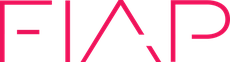

<center>
    <span style="color: #ed145b; font-size: 16pt; font-family: Arial, Helvetica, sans-serif; display: inline-flex; align-items: center;">Faculdade de Informática e Administração Paulista</span>
    <br/><br/>
    <span style="color: #ed145b; font-size: 12pt; font-family: Arial, Helvetica, sans-serif; display: inline-flex; align-items: center;">Inteligência Artificial e Computacional</span>
</center>

<span style="font-size: 12pt; font-family: 'Courier New', Courier, monospace;" >
    <center><strong>Integrantes:</strong></center>
    <table cellspacing="0" cellpadding="2" style="font-size: 12pt; font-family: 'Courier New', Courier, monospace;">
        <tr>
            <td>Bruno Jin Nakagawa</td>
            <td>RM82107</td>
        </tr>
        <tr>
            <td>Luca Alexandre Parra Pinto</td>
            <td>RM82617</td>
        </tr>
        <tr>
            <td>Lucca D'Alessio</td>
            <td>RM80877</td>
        </tr>
        <tr>
            <td>Matheus Wilson Queiroz</td>
            <td>RM82008</td>
        </tr>
        <tr>
            <td>Rodrigo Nascimento de Souza</td>
            <td>RM81948</td>
        </tr>
        <tr>
            <td>Thais Helena Fernandes Marques</td>
            <td>RM83621</td>
        </tr>
      </table>
</span>

# Pump it Up


## Introdução

Realizar análise exploratória do conjuntos de dados da Taarifa, uma plataforma open source para a geração de relatórios e a triagem de informações relacionadas à infraestrutura. Ele possuem projetos na Tanzania, entre outros parceiros.

O conjunto de dados disponibilizado pela Taarifa provem de uma parceira com o Ministério das Águas da Tanzânia.

Na lista abaixo estão todas as funcionalidades dos campos presentes no csv: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/#features_list

## Objetivo

Analisar e identificar questões semânticas sobre esses conjuntos de dados. As análises foram criadas em Python3 e discutidas entre os integrantes da equipe para chegar em um consenso.

### Questões

1. Q1- 
2. Q2- 
3. Q3- 

#### Bibliotecas
A biblioteca Pandas foi utlizada para extrair as informações do _dataset_ e iniciar as análises

In [9]:
import pandas as pd

#### Importando o _dataset_

In [10]:
dataset = pd.read_csv("data/pumpit.csv", index_col=0)

In [11]:
dataset.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
